<a href="https://colab.research.google.com/github/gmazzitelli/GSN2/blob/master/AnagraficheCSN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisi Anagrafiche CSN2

In [2]:
# 
# data source https://reportgodiva.dsi.infn.it/ per anagrafiche
# data source https://dbprogetti.dsi.infn.it/dbprogetti/listaProgettiFE per progetti su fondi esterni
# https://drive.google.com/file/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/
# 
def load_from_gspreadsheet(key, sheet_name):
    # google spredsheet TO url 
    # url = "https://docs.google.com/spreadsheet/ccc?key="+key+"&output=csv&sheet={Sheet2}"
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))
    print(url)
    return url
def sp2pd(key, sheet_name, verbose=False):
    # spreadsheet TO Panda
    import pandas as pd
    df = pd.read_csv(load_from_gspreadsheet(key, sheet_name))
    # df = df[df.File_Number.isnull() == False]
    df.fillna('', inplace=True)
    if verbose: print ('Variables: ', df.columns.values)
    return df
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fast')
plt.rc('font', size = 14, family ='Sans-Serif')

In [3]:
INFN = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='INFN')
CSN2 = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='CSN2')

https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=INFN&headers=1
https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=CSN2&headers=1


In [4]:
CSN2

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto
0,Acerbi,Fabio,36,M,(01/01/2020 - 31/12/2020) Associato Scientific...,30% - (TIFP:CSN2) DARKSIDE (Ricercatore),
1,Acernese,Fausto,45,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,20% - (NA:CSN2) ET_ITALIA (Ricercatore)\n 80% ...,
2,Addazi,Andrea,31,M,(15/01/2020 - 31/12/2020) Associato Scientific...,40% - (ROMA2:CSN2) DAMA (Ricercatore),
3,Addesso,Paolo,45,M,(01/01/2020 - 31/12/2020) Associato Tecnologic...,20% - (SA:CSN2) VIRGO (Ricercatore),
4,Adriani,Oscar,55,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,30% - (FI:CSN1) LHCF (Ricercatore)\n 70% - (FI...,
...,...,...,...,...,...,...,...
1587,Zendri,Jean Pierre,57,M,,40% - (PD:CSN2) ET_ITALIA (Ricercatore)\n 60% ...,
1588,Zichichi,Antonino,90,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,0% - (BO:CSN2) AMS2 (Ricercatore)\n 0% - (BO:C...,
1589,Zuccarello,Francesca,66,F,(01/01/2020 - 31/12/2020) Associato Scientific...,20% - (CT:CSN2) AUGER (Ricercatore)\n 30% - (C...,
1590,Zucchelli,Stefano,66,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,60% - (BO:CSN1) LHC-B (Ricercatore)\n 30% - (B...,


In [6]:
dipendenti = pd.DataFrame(columns = CSN2.columns) 
associati  = pd.DataFrame(columns = CSN2.columns) 
dottorandi = pd.DataFrame(columns = CSN2.columns) 
borsisti   = pd.DataFrame(columns = CSN2.columns) 
assegnisti = pd.DataFrame(columns = CSN2.columns) 
tecnici    = pd.DataFrame(columns = CSN2.columns) 
for i, contratto in enumerate(CSN2.Contratti):
  if contratto == '':
    dipendenti = dipendenti.append(CSN2.iloc[i], ignore_index=True)
  elif contratto.find('Associato')>=0:
    associati = associati.append(CSN2.iloc[i], ignore_index=True)
  if contratto.find('Dottorando')>=0:
    dottorandi = dottorandi.append(CSN2.iloc[i], ignore_index=True)
  if contratto.find('Borsista')>=0:
    borsisti = borsisti.append(CSN2.iloc[i], ignore_index=True)
  if contratto.find('Assegnista')>=0:
    assegnisti = assegnisti.append(CSN2.iloc[i], ignore_index=True)
  if contratto.find('Tecnico')>=0:
    tecnici = tecnici.append(CSN2.iloc[i], ignore_index=True)

print (len(CSN2),len(dipendenti), len(associati), len(dottorandi), len(borsisti), len(assegnisti), len(tecnici))

1592 624 877 127 13 59 44


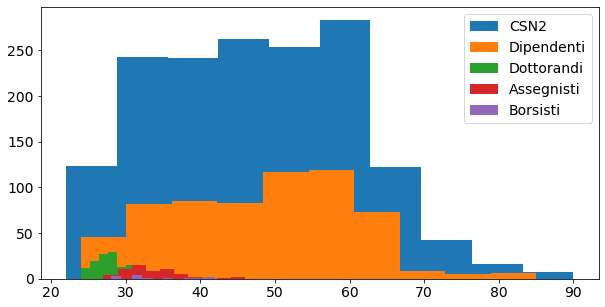

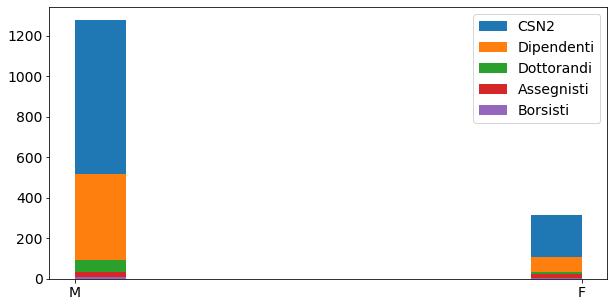

In [25]:
plt.figure(figsize = (10,5))
plt.hist(CSN2["Eta'"], label='CSN2')
plt.hist(dipendenti["Eta'"], label='Dipendenti')
plt.hist(dottorandi["Eta'"], label='Dottorandi')
plt.hist(assegnisti["Eta'"], label='Assegnisti')
plt.hist(borsisti["Eta'"], label='Borsisti')
#plt.yscale('log')
plt.legend()
plt.show()
plt.figure(figsize = (10,5))
plt.hist(CSN2.Genere, label='CSN2')
plt.hist(dipendenti.Genere, label='Dipendenti')
plt.hist(dottorandi.Genere, label='Dottorandi')
plt.hist(assegnisti.Genere, label='Assegnisti')
plt.hist(borsisti.Genere, label='Borsisti')
#plt.yscale('log')
plt.legend()
plt.show()

In [7]:
borsisti

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto
0,Alexandrov,Andrey,40,M,(03/05/2020 - 02/05/2021) Associato Scientific...,100% - (NA:CSN2) NEWS (Ricercatore),
1,Asada,Takashi,32,M,(01/06/2019 - 31/05/2021) Dipendente Borse pos...,100% - (LNGS:CSN2) NEWS (Ricercatore),FOE (01-06-2019 / 31-05-2021)
2,Carniti,Paolo,31,M,(01/02/2018 - 31/01/2022) Associato Scientific...,20% - (MIB:CSN1) FASE2_CMS (Tecnologo)\n 60% -...,
3,Ferella,Francesco,29,M,(02/03/2020 - 01/03/2021) Dipendente Neolaurea...,100% - (LNGS:CSN2) GERDA (Ricercatore),GERDA CF (02-03-2020 / 01-03-2021)
4,Fronzé,Gabriele Gaetano,28,M,(05/11/2019 - 04/11/2020) Dipendente Da defini...,95% - (TO:CSN2) VIRGO (Tecnologo)\n 5% - (TO:C...,HPC_HTC (05-11-2019 / 04-11-2020)
5,Guberman,Daniel Alberto,32,M,(01/10/2018 - 30/09/2020) Dipendente Borse pos...,100% - (PI:CSN2) CTA (Ricercatore),FOE (01-10-2018 / 30-09-2020)
6,La Rana,Adele,42,F,(31/10/2019 - 30/10/2020) Associato Scientific...,30% - (ROMA1:CSN2) VIRGO (Ricercatore),
7,Marini,Laura,31,F,(18/05/2020 - 17/05/2021) Associato Scientific...,70% - (LNGS:CSN2) CUORE (Ricercatore)\n 30% - ...,
8,Mese,Marco,29,M,(11/05/2020 - 10/11/2020) Dipendente Borse neo...,20% - (NA:CSN2) HERD_DMP (Ricercatore)\n 80% -...,FOE (11-05-2020 / 10-11-2020)
9,Ripoli,Cristina,33,F,(24/07/2020 - 07/05/2021) Associato Tecnologic...,50% - (SA:CSN2) DARKSIDE (Ricercatore)\n 50% -...,


In [16]:
for i, esperimento in enumerate(borsisti.Esperimenti):
  print (esperimento.split("\n"))

['100% - (NA:CSN2) NEWS (Ricercatore)']
['100% - (LNGS:CSN2) NEWS (Ricercatore)']
['20% - (MIB:CSN1) FASE2_CMS (Tecnologo)', ' 60% - (MIB:CSN1) LHC-B (Tecnologo)', ' 20% - (MIB:CSN2) CUPID (Tecnologo)']
['100% - (LNGS:CSN2) GERDA (Ricercatore)']
['95% - (TO:CSN2) VIRGO (Tecnologo)', ' 5% - (TO:CSN3) ALICE (Tecnologo)']
['100% - (PI:CSN2) CTA (Ricercatore)']
['30% - (ROMA1:CSN2) VIRGO (Ricercatore)']
['70% - (LNGS:CSN2) CUORE (Ricercatore)', ' 30% - (LNGS:CSN2) CUPID (Ricercatore)']
['20% - (NA:CSN2) HERD_DMP (Ricercatore)', ' 80% - (NA:CSN2) LIMADOU_CSN2 (Ricercatore)']
['50% - (SA:CSN2) DARKSIDE (Ricercatore)', ' 50% - (SA:CSN3) ALICE (Ricercatore)']
['20% - (NA:CSN2) QUAX (Tecnologo)', ' 80% - (NA:CSN6) THOR (Tecnologo)']
['100% - (CT:CSN2) ICARUS (Ricercatore)']
['20% - (TO:CSN2) VIRGO (Tecnologo)', ' 70% - (TO:CSN3) ALICE (Tecnologo)', ' 10% - (TO:CSN5) ML_INFN (Tecnologo)']
